# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import SelectKBest, f_classif

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
df = pd.read_csv('Dataset_clustering.csv')

df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18,Student,172,1,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37,Doctor,139,1,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67,Retired,291,1,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51,Engineer,86,1,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55,Doctor,120,1,1021.88,2024-11-04 08:06:32


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [5]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [6]:
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002496,AC00460,NaN,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


In [7]:
df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [8]:
df.duplicated().sum()

np.int64(0)

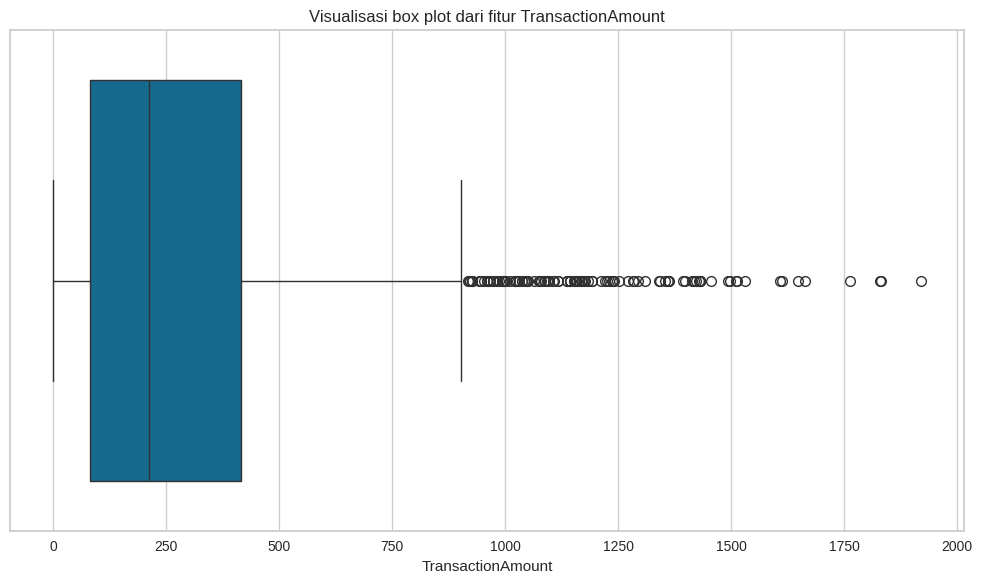

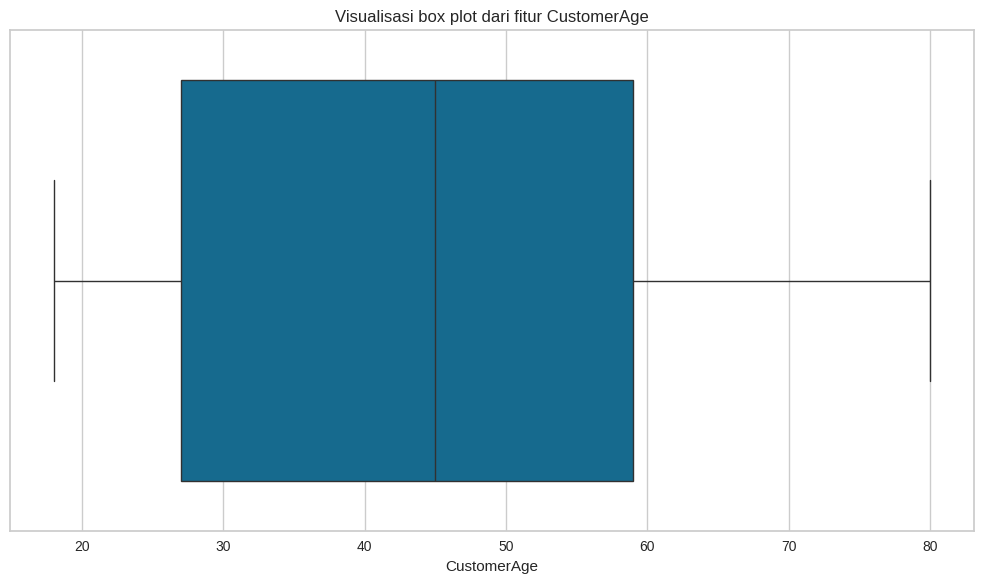

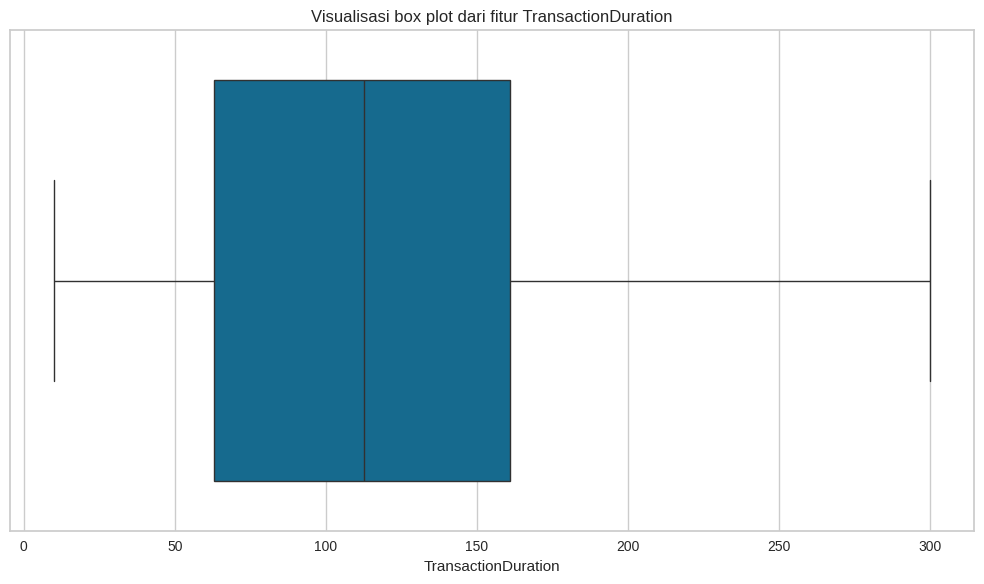

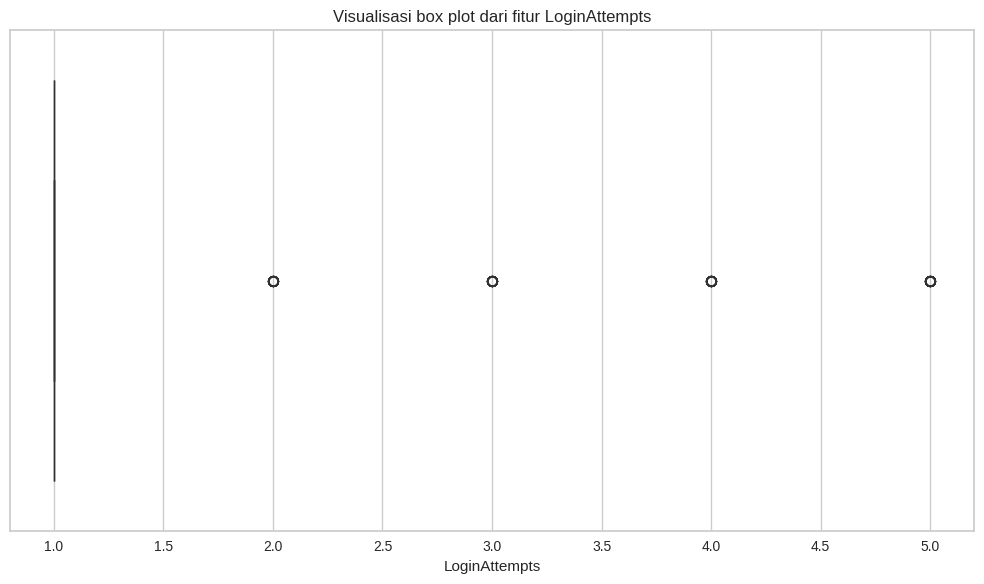

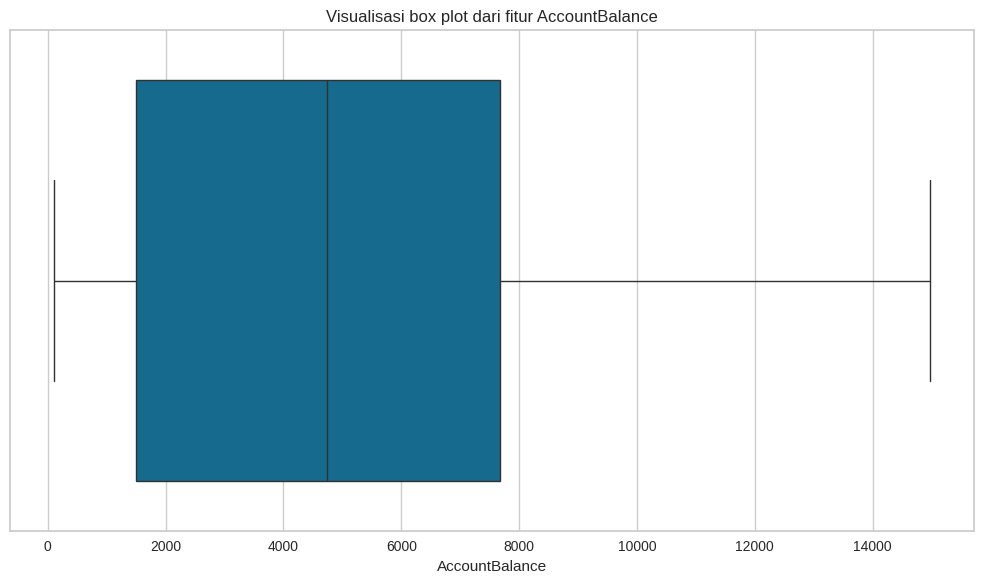

In [9]:
numeric_features = df.select_dtypes(include=['number'])

for col in numeric_features.columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Visualisasi box plot dari fitur {col}')
  plt.tight_layout()
  plt.show()

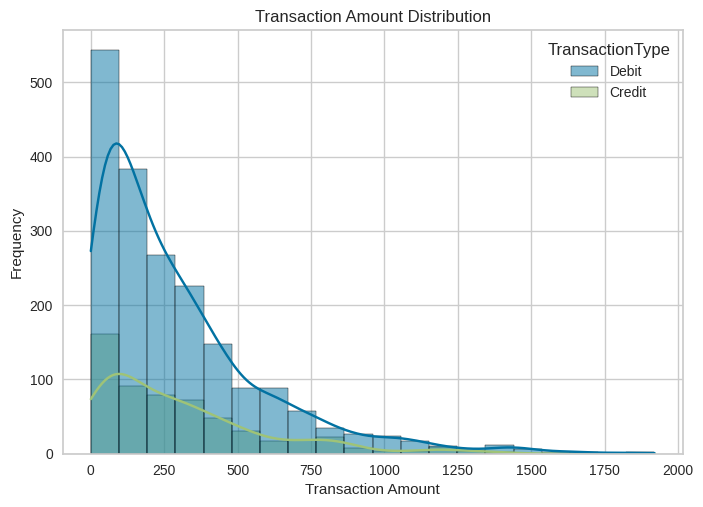

In [10]:
sns.histplot(data=df, x='TransactionAmount', bins=20, kde=True, hue='TransactionType')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

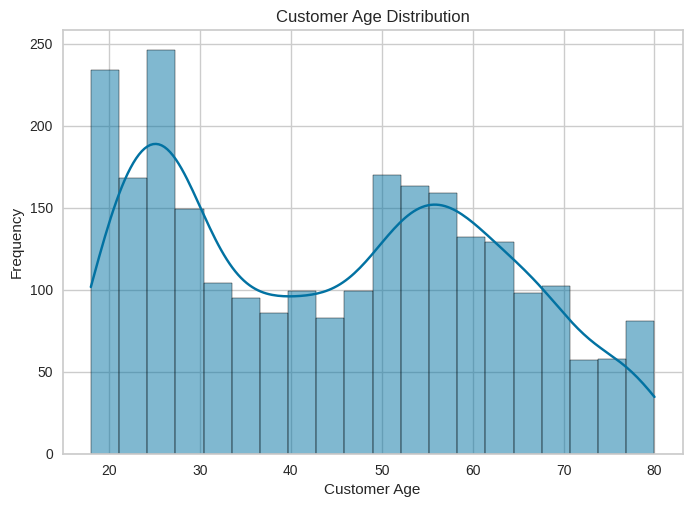

In [11]:
sns.histplot(df['CustomerAge'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

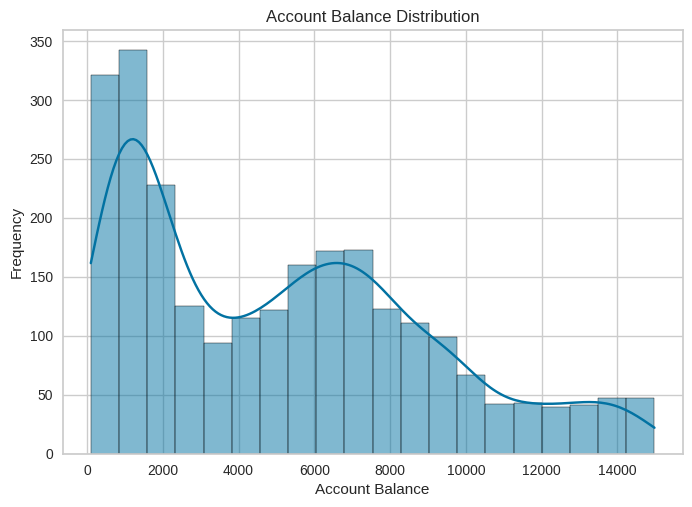

In [12]:
sns.histplot(df['AccountBalance'], bins=20, kde=True)
plt.title('Account Balance Distribution')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.show()

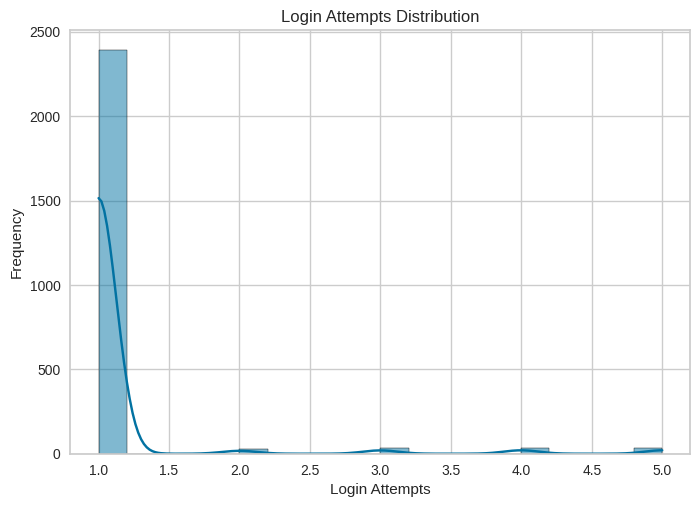

In [13]:
sns.histplot(df['LoginAttempts'], bins=20, kde=True)
plt.title('Login Attempts Distribution')
plt.xlabel('Login Attempts')
plt.ylabel('Frequency')
plt.show()

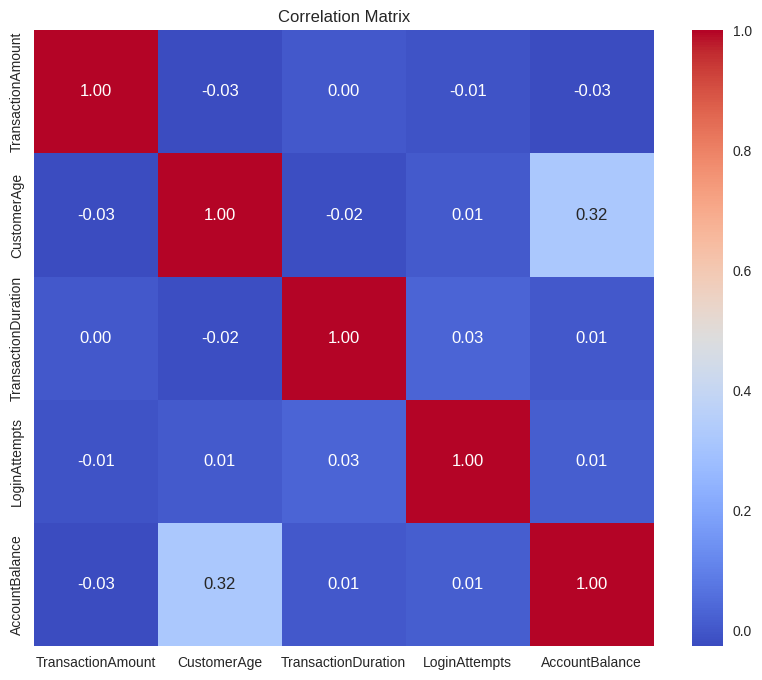

In [14]:
corr_matrix = numeric_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [15]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

df['TimeGap'] = -1*(df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds() / 60
df['TransactionHour'] = df['TransactionDate'].dt.hour

In [16]:
# Memilih fitur yang relevan saja yang akan digunakan
X = df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance', 'LoginAttempts', 'TimeGap', 'TransactionHour']]
X.head()

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,LoginAttempts,TimeGap,TransactionHour
0,14.09,70,81,5112.21,1,824618.900000,16
1,376.24,68,141,13758.91,1,713725.266667,16
2,126.29,19,56,1122.35,1,694910.933333,18
3,184.50,26,25,8569.06,1,790056.916667,16
4,13.45,26,198,7429.40,1,553815.250000,17


In [17]:
# Melakukan standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,LoginAttempts,TimeGap,TransactionHour
0,-0.971275,1.423718,-0.552443,-0.000537,-0.206794,0.800762,-0.856729
1,0.269440,1.311287,0.305314,2.216472,-0.206794,0.076706,-0.856729
2,-0.586882,-1.443277,-0.909842,-1.023534,-0.206794,-0.046138,1.879574
3,-0.387456,-1.049768,-1.353017,0.885797,-0.206794,0.575097,-0.856729
4,-0.973468,-1.049768,1.120184,0.593589,-0.206794,-0.967391,0.511423


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

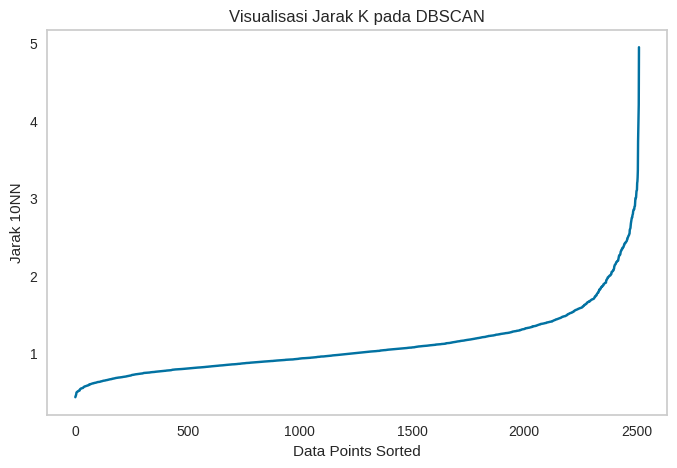

In [18]:
# Menentukan jumlah tetangga
k = 10
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Mengambil jarak ke tetangga ke-k
distances = np.sort(distances[:, k-1], axis=0)

plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel("Data Points Sorted")
plt.ylabel(f'Jarak {k}NN')
plt.title("Visualisasi Jarak K pada DBSCAN")
plt.grid()
plt.show()

In [19]:
# Mengatur parameter DBSCAN
dbscan = DBSCAN(eps=2, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = dbscan_labels

label_mapping = {-1: 'Fraud', 0: 'Normal', 1: 'Suspicious'}
df['DBSCAN_Cluster'] = df['DBSCAN_Cluster'].map(label_mapping)

## **b. Evaluasi Model Clustering**

In [20]:
# Mencari nilai silhouette score
silhouette_avg = silhouette_score(X_scaled, dbscan_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.4069


Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [21]:
# Melakukan feature selection dengan metode filter methods
df['DBSCAN_Cluster'] = df['DBSCAN_Cluster'].fillna(df['DBSCAN_Cluster'].mode()[0])

y = df['DBSCAN_Cluster']
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X_scaled, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['LoginAttempts', 'TransactionHour'], dtype='object')


In [22]:
# Evaluasi DBSCAN setelah Feature Selection
mask = y != -1
silhouette_avg = silhouette_score(X_selected[mask], y[mask])

print(f"Silhouette Score setelah Feature Selection: {silhouette_avg:.4f}")

Silhouette Score setelah Feature Selection: 0.7537


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

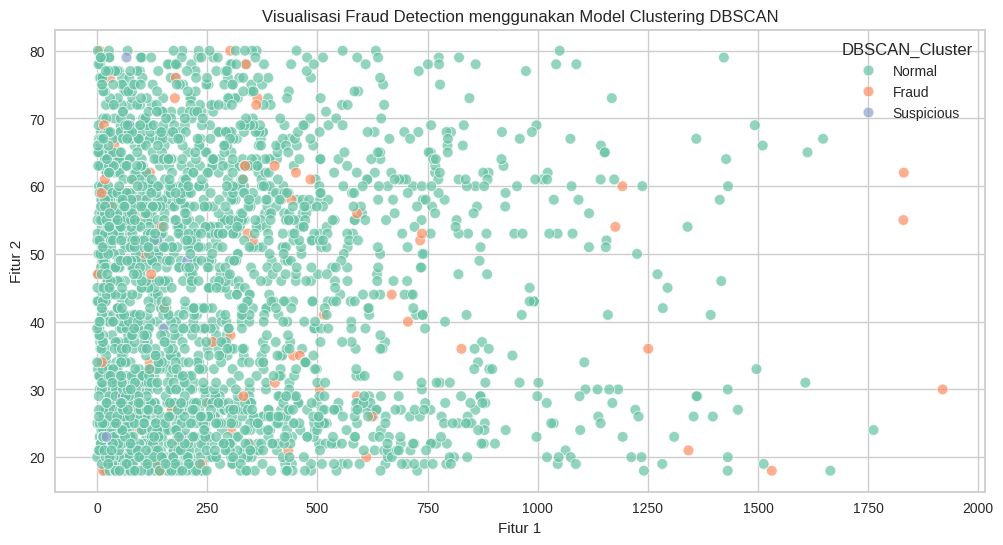

In [23]:
# Visualisasi Clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='Set2', alpha=0.7, s=60)
plt.title('Visualisasi Fraud Detection menggunakan Model Clustering DBSCAN')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [24]:
df['DBSCAN_Cluster'] = dbscan_labels

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [25]:
df_normalized = scaler.inverse_transform(X_scaled)
df_original = pd.DataFrame(df_normalized, columns=X.columns)
df_original['DBSCAN_Cluster'] = df['DBSCAN_Cluster']

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [26]:
selected_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance',
                     'LoginAttempts', 'TimeGap', 'TransactionHour', 'DBSCAN_Cluster']
df_selected = df[selected_features]

numeric_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration',
                    'AccountBalance', 'LoginAttempts', 'TimeGap', 'TransactionHour']
numeric_summary = df_selected.groupby('DBSCAN_Cluster')[numeric_features].agg(['min', 'max', 'mean'])

print("Ringkasan Statistik Fitur Numerik per Cluster:")
numeric_summary

Ringkasan Statistik Fitur Numerik per Cluster:


TransactionAmount                      CustomerAge      \
                             min      max        mean         min max   
DBSCAN_Cluster                                                          
-1                          1.93  1919.11  405.678667          18  80   
 0                          0.26  1762.28  295.321507          18  80   
 1                         21.23   312.47  124.065333          23  79   

                          TransactionDuration                  AccountBalance  \
                     mean                 min  max        mean            min   
DBSCAN_Cluster                                                                  
-1              44.986667                  11  291  137.933333         271.78   
 0              44.664327                  10  300  119.010322         101.25   
 1              44.666667                  55  275  130.400000         319.18   

                ...              LoginAttempts                      TimeGap  \
                ...         mean           min max      mean            min   
DBSCAN_Cluster  ...                                                           
-1              ...  5941.862267             1   5  3.960000  458867.783333   
 0              ...  5091.363501             1   3  1.018993  442904.850000   
 1              ...  4680.465333             3   5  4.000000  574051.850000   

                                             TransactionHour                 
                          max           mean             min max       mean  
DBSCAN_Cluster                                                               
-1              965739.566667  724801.924000              16  18  16.866667  
 0              967211.133333  701386.035783              16  18  16.622213  
 1              836166.000000  683305.202222              16  17  16.066667  

[3 rows x 21 columns]

In [27]:
print("Interpretasi Pola per Cluster:")
for cluster in df_selected['DBSCAN_Cluster'].unique():
    print(f"Cluster {cluster}:")
    cluster_data = df_selected[df_selected['DBSCAN_Cluster'] == cluster]
    print(f"- Rata-rata transaksi: {cluster_data['TransactionAmount'].mean():.2f}")
    print(f"- Usia rata-rata pelanggan: {cluster_data['CustomerAge'].mean():.1f}")
    print(f"- Rata-rata saldo akun: {cluster_data['AccountBalance'].mean():.2f}")
    print(f"- Rata-rata upaya login: {cluster_data['LoginAttempts'].mean():.1f}")
    print(f"- Rata-rata durasi transaksi: {cluster_data['TransactionDuration'].mean():.2f}")
    print(f"- Rata-rata jeda waktu transaksi: {cluster_data['TimeGap'].mean():.2f}")
    print(f"- Jam transaksi terbanyak: {cluster_data['TransactionHour'].mode()[0]}")
    print()

Interpretasi Pola per Cluster:
Cluster 0:
- Rata-rata transaksi: 295.32
- Usia rata-rata pelanggan: 44.7
- Rata-rata saldo akun: 5091.36
- Rata-rata upaya login: 1.0
- Rata-rata durasi transaksi: 119.01
- Rata-rata jeda waktu transaksi: 701386.04
- Jam transaksi terbanyak: 16

Cluster -1:
- Rata-rata transaksi: 405.68
- Usia rata-rata pelanggan: 45.0
- Rata-rata saldo akun: 5941.86
- Rata-rata upaya login: 4.0
- Rata-rata durasi transaksi: 137.93
- Rata-rata jeda waktu transaksi: 724801.92
- Jam transaksi terbanyak: 17

Cluster 1:
- Rata-rata transaksi: 124.07
- Usia rata-rata pelanggan: 44.7
- Rata-rata saldo akun: 4680.47
- Rata-rata upaya login: 4.0
- Rata-rata durasi transaksi: 130.40
- Rata-rata jeda waktu transaksi: 683305.20
- Jam transaksi terbanyak: 16



### 1. Cluster 1 (Cluster -1):
- Rata-rata transaksi: 405.68
- Usia rata-rata pelanggan: 45.0 Tahun
- Rata-rata saldo akun: 5941.86
- Rata-rata upaya login: 4.0
- Rata-rata durasi transaksi: 137.93 Detik
- Rata-rata jeda waktu transaksi: 724801.92 Detik
- Jam transaksi terbanyak: Pukul 17
- Analisis: Cluster ini dikategorikan sebagai **Fraud**. Karakteristiknya menunjukkan adanya jumlah transaksi yang sangat besar, saldo akun yang tinggi, dan frekuensi login yang rendah. Hal-hal tersebut bisa saja mengindikasikan aktivitas penipuan di mana pelaku hanya masuk sesekali untuk melakukan transaksi dalam jumlah besar, lalu tidak aktif dalam waktu yang lama.

### 2. Cluster 2 (Cluster 0):
- Rata-rata transaksi: 295.32
- Usia rata-rata pelanggan: 44.7 Tahun
- Rata-rata saldo akun: 5091.36
- Rata-rata upaya login: 1.0
- Rata-rata durasi transaksi: 119.01 Detik
- Rata-rata jeda waktu transaksi: 701386.04 Jam
- Jam transaksi terbanyak: Pukul 16
- Analisis: Cluster ini terdiri dari akun yang dikategorikan sebagai **Normal**, dengan transaksi sedang, frekuensi login yang wajar, dan saldo akun yang stabil. Tidak ada indikasi kuat dari pola yang mencurigakan, dan cluster ini terlihat sebagai pengguna yang melakukan transaksi sesuai kebutuhan mereka.

### 3. Cluster 3 (Cluster 1):
- Rata-rata transaksi: 124.07
- Usia rata-rata pelanggan: 44.7 Tahun
- Rata-rata saldo akun: 4680.47
- Rata-rata upaya login: 4.0
- Rata-rata durasi transaksi: 130.40 Detik
- Rata-rata jeda waktu transaksi: 683305.20 Detik
- Jam transaksi terbanyak: Pukul 16
- Analisis: Cluster ini dikategorikan sebagai **Suspicious**, karena memiliki jumlah transaksi yang relatif kecil, tetapi jumlah login yang tinggi. Ini bisa menunjukkan adanya upaya berulang untuk masuk ke akun, mungkin karena percobaan akses tidak sah atau aktivitas mencurigakan lainnya.

### Kesimpulan:
- Cluster -1 (Fraud): Harus diberikan pengawasan ketat, dengan penerapan verifikasi tambahan sebelum transaksi besar dilakukan.
- Cluster 0 (Normal): Bisa menjadi target program loyalitas untuk meningkatkan engagement.
- Cluster 1 (Suspicious): Perlu pemantauan lebih lanjut, terutama pada pola login yang tidak wajar.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [28]:
# Mengekspor dataset
df_original.to_csv('Dataset_inisiasi.csv', index=False)